In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

PATH = "../Notebooks - Class/Datasets/titanic.csv"  # works if pwd = '.../ds-1.1/Quiz'

df = pd.read_csv(PATH)

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Probability Distribution Function (PDF)

- PDF is similar to a histogram. The only difference is we normalize the value of histogram

- Lets plot the histogram for Age in Titanic

## Histogram

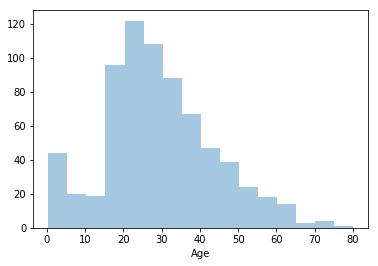

In [3]:
import seaborn as sns
sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16)

## PDF

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


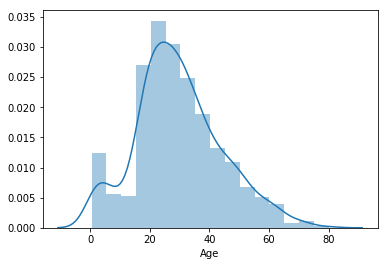

In [4]:
import seaborn as sns
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

## Use custom histogram function to verify the area in the range of 20-25 for age

In [5]:
def custom_binned_frequency_histogram(dataset, bins):
    # Create object to hold ranges of buckets
    buckets = []

    """ STRETCH CHALLENGE: Create custom cleaning function and call here based on `dataset` and `feature` args
    and return individual dataset (e.g. ages). """
    # CUSTOM CODE GOES HERE!

    """ We need to access our data's minimum and maximum values, and have a step size 
    to move across our range and iteratively create our buckets based on our number of bins. """
    STEP = int(np.max(dataset) / bins)
    floor, ceiling = int(np.min(dataset)), int(np.min(dataset)) + STEP
    print(floor, ceiling)

    """ We need to use our STEPs to increment over our data's range and create subranges of buckets. 
    This will contain the ranges of data that are attributed to each individual bucket for our histogram. """
    for position in range(bins):
        current_bucket = range(floor, ceiling)
        buckets.append(current_bucket)
        floor += STEP; ceiling += STEP

    """ We need to cast our data into our bucketed histogram by frequency.
    This may require altering our final histogram object. """
    # Recast Buckets to New Histogram Object: Dictogram
    frequency_dict = dict((bucket, 0) for bucket in buckets)

    # Loop through ages and buckets and cast ages to buckets in histogram
    for age in dataset:
        for bucket in buckets:
            if age in bucket:
                frequency_dict[bucket] += 1

    """ We need to send our frequency histogram to a MatPlotLib object to visualize. """
    # Instantiate plotting space in Jupyter Notebook
    plt.figure(figsize=(15, 10))

    # Produce bar chart (histogram) of frequency histogram data.
    plt.bar(np.arange(bins), frequency_dict.values())

    # Rename X-ticks to Bucket Ranges
    plt.xticks(np.arange(bins), frequency_dict.keys())

    # Display our MatPlotLib visualization.
    plt.show()
    


0 5


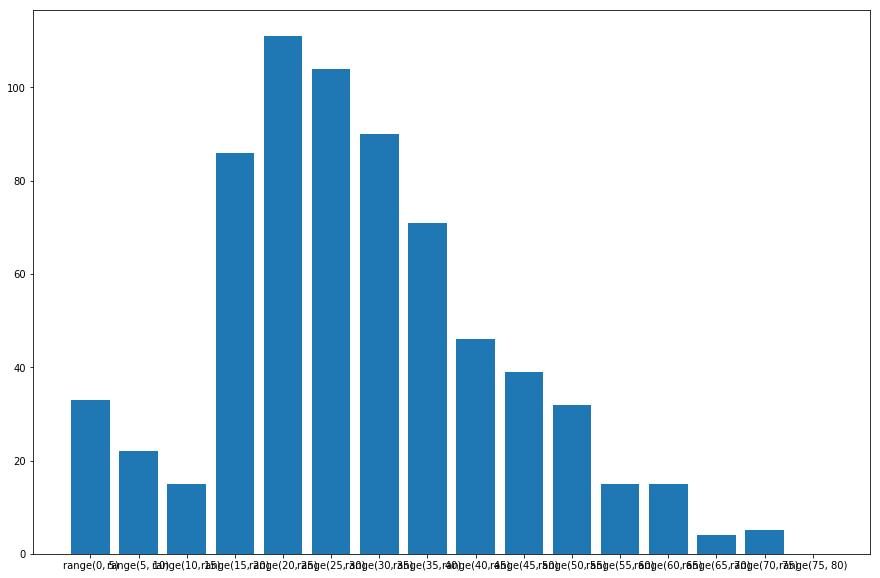

In [6]:
custom_binned_frequency_histogram(df["Age"], 16)

## What percentage of passengers are younger than 40?

In [7]:
ARG_TOTAL_PASSENGERS = len(df["Age"].dropna())
ARG_UNDER_40 = len(df[df["Age"] <= 40])
ARG_PERCENTAGE = (ARG_UNDER_40 / ARG_TOTAL_PASSENGERS) * 100
ARG_PERCENTAGE

78.99159663865547

## It is difficult to calculate probability with PDF as we need to know the area

`CDF`: **PROBABILITY** of selecting a value `X` or any value lower than it in our data.

In [8]:
# For a given array of numbers and a given threshold,  Count how many elements in the array is less than the threshold

def count(ls, threshold):
    counter = 0
    
    for number in ls:
        if number < threshold:
            counter += 1
            
    return counter

In [9]:
# Change the threshold from the minimum to maximum value of the array

def count_2(ls, threshold):
    counter = 0
    
    for i in range(np.min(ls), np.max(ls)):
        if ls[i] < threshold:
            counter += 1
            
    return counter


def cdf_func(`array of values`, `single value X`):
    # Find the probability (ratio of all values) **left** of `X` over the whole array.
    # len(arr where values < X) / len(arr)

## Or use disgusting one liner :)

In [10]:
ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

cdf_age = [calculate_cdf(ls_age, r)/len(ls_age) for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]

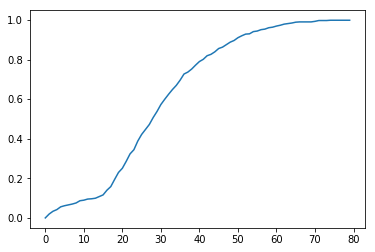

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)

## Normal Distribution
- Bell shaped PDF or Histogram
- A "Normal" histogram

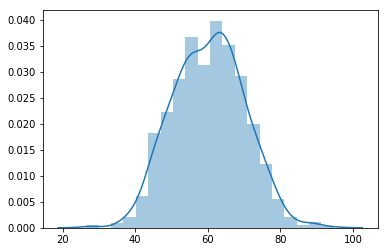

In [12]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

## What percentage of students that got greater than 70%?

In [13]:
from scipy.stats import norm

# loc = mean
# scale = standard deviation

print(norm.sf(70, loc=60, scale=10))

#OR - Survival of norm at 70.

1 - norm.cdf(70, loc=60, scale=10)

0.15865525393145707


0.15865525393145707

- Show that about 68% of the values in a are in [50, 70] range


In [14]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

## If we scale the Normal Ditribution, zero mean and unit std (std dev = 1)

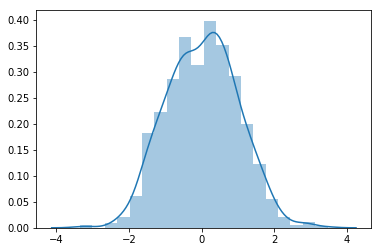

In [15]:
b = (a - 60)/10
sns.distplot(b, hist=True, kde=True, bins=20)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


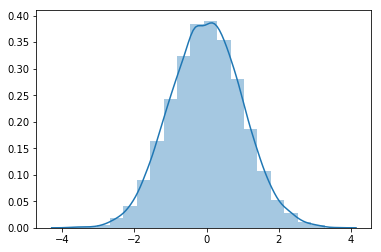

In [18]:
# Z = (A-mean(A)/std(A))

mean_X = 60
std_X = 10

X = np.random.normal(mean_X, std_X, 10000)

Z = (X - mean_X)/std_X
sns.distplot(Z, hist=True, kde=True, bins=20)

## Null Hypothesis